In [144]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    #split dataset func

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
 

In [145]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [146]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [148]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [149]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [150]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [151]:
rows = len(df.axes[0])
print(rows)

5110


In [152]:
cols = len(df.axes[1])
print(cols)

12


In [153]:
df.drop(["id"], axis=1, inplace = True)


In [154]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Covert data into numeric

In [155]:
df.replace(to_replace = "Male" , value = 0 , inplace = True)
df.replace(to_replace = "Female" , value = 1 , inplace = True)
df.replace(to_replace = "Other" , value = 2 , inplace = True)

#even married
df.replace(to_replace = "Yes" , value = 1 , inplace = True)
df.replace(to_replace = "No" , value = 0 , inplace = True)

#work_type
df.replace(to_replace = "Private" , value = 0 , inplace = True)
df.replace(to_replace = "Self-employed" , value = 1 , inplace = True)
df.replace(to_replace = "Govt_job" , value = 2 , inplace = True)
df.replace(to_replace = "Never_worked" , value = 3 , inplace = True)
df.replace(to_replace = "children" , value = 4, inplace = True)

#Residence
df.replace(to_replace = "Urban" , value = 0 , inplace = True)
df.replace(to_replace = "Rural" , value = 1 , inplace = True)

#smoking status
df.replace(to_replace = "formerly smoked" , value = 0 , inplace = True)
df.replace(to_replace = "never smoked" , value = 1 , inplace = True)
df.replace(to_replace = "smokes" , value = 2 , inplace = True)
df.replace(to_replace = "Unknown" , value = 3 , inplace = True)

In [156]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.6,0,1
1,1,61.0,0,0,1,1,1,202.21,NaN,1,1
2,0,80.0,0,1,1,0,1,105.92,32.5,1,1
3,1,49.0,0,0,1,0,0,171.23,34.4,2,1
4,1,79.0,1,0,1,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,0,83.75,NaN,1,0
5106,1,81.0,0,0,1,1,0,125.20,40.0,1,0
5107,1,35.0,0,0,1,1,1,82.99,30.6,1,0
5108,0,51.0,0,0,1,0,1,166.29,25.6,0,0


In [157]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Manage Null Value

In [182]:
mean = 35

In [186]:
df['bmi'] =df['bmi'].fillna(mean)

In [187]:
df['bmi'].isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

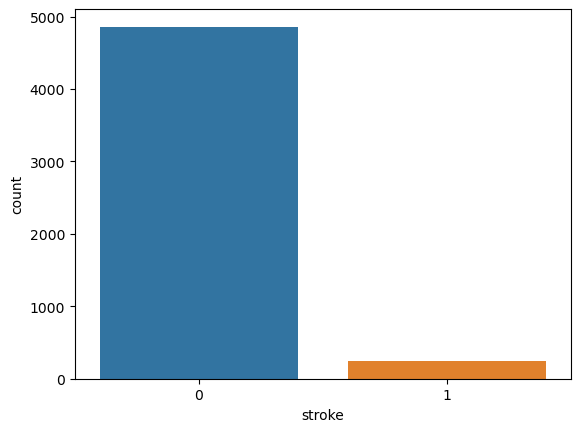

In [175]:
seaborn.countplot(df['stroke'])

In [160]:
data0 = df[df['stroke'] == 0]
data1 = df[df['stroke'] == 1]
total_0 = data0["stroke"].count()
total_1 = data1["stroke"].count()
print("Number of 0 data:",total_0)
print("Number of 1 data:",total_1)

pct_0 = total_0 / (total_0 + total_1) * 100
pct_1 = total_1 / (total_0 + total_1) * 100
print("Number of O data = ",pct_0,"%")
print("Number of 1 data = ",pct_1,"%")

Number of 0 data: 4861
Number of 1 data: 249
Number of O data =  95.12720156555773 %
Number of 1 data =  4.87279843444227 %


In [161]:
target=df['stroke']

# split dataset

In [162]:
training, testing = train_test_split(df, test_size=0.3, shuffle=True, random_state=32, stratify=target)

print(pd.value_counts(training['stroke']))
print(pd.value_counts(testing['stroke']))

0    3403
1     174
Name: stroke, dtype: int64
0    1458
1      75
Name: stroke, dtype: int64


In [163]:
train_x,test_y=train_test_split(df,test_size=0.3,stratify=df['stroke'])
total_0 = training[training['stroke'] == 1].shape[0]
total_1 = training[training['stroke'] == 0].shape[0]
ratio = total_0 / total_1
print("0 data:", total_0)
print("1 data :", total_1)
print("0 data ratio:", total_0/(total_0+total_1)*100)
print("1 data ratio:", total_1/(total_0+total_1)*100)

0 data: 174
1 data : 3403
0 data ratio: 4.86441151803187
1 data ratio: 95.13558848196813


# separate target variable from training data

In [164]:
train_x = training.drop(columns=['stroke'],axis=1)
train_y = training['stroke']

# Separate target variable from test data

In [165]:
test_x = testing.drop(columns=['stroke'],axis=1)
test_y = testing['stroke']

# Model Building

In [166]:
model = RandomForestClassifier()
model.fit(train_x , train_y)

RandomForestClassifier()

In [167]:
y_pred = model.predict(test_x)

In [184]:
accuracy = accuracy_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)


print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.9523809523809523
F1 Score: 0.07594936708860758


In [185]:
importances=model.feature_importances_
indices=np.argsort(importances)
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices])
plt.yticks(range(len(indices)),train_x.columns[indices])
plt.title('Importance Features')

AttributeError: 'SVC' object has no attribute 'feature_importances_'

# SVM

In [171]:
model = SVC(kernel = 'linear', C = 1)
model.fit(train_x, train_y)

SVC(C=1, kernel='linear')

In [172]:
pred = model.predict(test_x)

In [179]:
accuracy = accuracy_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.9523809523809523
F1 Score: 0.07594936708860758
